In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import FeatureAgglomeration
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, optimal_leaf_ordering, dendrogram
from sklearn.feature_selection import SelectKBest, chi2, f_classif, VarianceThreshold
import seaborn as sns
import openTSNE

original = "baseline"
channels = ["DNA", "AGP", "ER", "Mito"]

wells_original = pd.read_csv(f"{original}_wells.csv")

wells_DNA = pd.read_csv(f"DNA_wells.csv")
wells_AGP = pd.read_csv(f"AGP_wells.csv")
wells_ER = pd.read_csv(f"ER_wells.csv")
wells_Mito = pd.read_csv(f"Mito_wells.csv")

columns2 = list(map(str, range(672)))

features = wells_original[columns2]

features_DNA = wells_DNA[columns2]
features_AGP = wells_AGP[columns2]
features_ER = wells_ER[columns2]
features_Mito = wells_Mito[columns2]

## t-SNE - t-distributed Stochastic Neighbor Embedding
- Nonlinear dimensionality reduction

```perplexity```: number of nearest neighbors for each point

```early_exaggeration```: control tightness with which t-SNE will try to keep points together in the map space, higher value results in clusters more tightly drawn together

```n_iter```: number of iterations for optimization

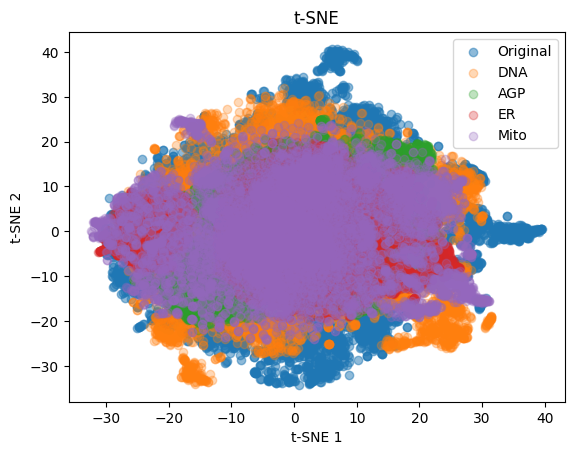

In [2]:
tsne = TSNE(n_components=2, perplexity=50, n_iter=500, early_exaggeration=6)

tsne_original = tsne.fit_transform(features)

tsne_DNA = tsne.fit_transform(features_DNA)
tsne_AGP = tsne.fit_transform(features_AGP)
tsne_ER = tsne.fit_transform(features_ER)
tsne_Mito = tsne.fit_transform(features_Mito)

In [ ]:
plt.figure()
plt.scatter(tsne_original[:,0], tsne_original[:,1], alpha=0.5, label='Original')
plt.scatter(tsne_DNA[:,0], tsne_DNA[:,1], alpha=0.3, label="DNA")
plt.scatter(tsne_AGP[:,0], tsne_AGP[:,1], alpha=0.3, label="AGP")
plt.scatter(tsne_ER[:,0], tsne_ER[:,1], alpha=0.3, label="ER")
plt.scatter(tsne_Mito[:,0], tsne_Mito[:,1], alpha=0.3, label="Mito")
plt.title('t-SNE')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.legend()

In [3]:
# openTSNE
open_tsne_original = openTSNE.TSNE().fit(np.array(features))
open_tsne_DNA = openTSNE.TSNE().fit(np.array(features_DNA))
open_tsne_AGP = openTSNE.TSNE().fit(np.array(features_AGP))
open_tsne_ER = openTSNE.TSNE().fit(np.array(features_ER))
open_tsne_Mito = openTSNE.TSNE().fit(np.array(features_Mito))

plt.figure()
plt.scatter(open_tsne_original[:,0], open_tsne_original[:,1], alpha=0.5, label='Original')
plt.scatter(open_tsne_DNA[:,0], open_tsne_DNA[:,1], alpha=0.5, label='DNA')
plt.scatter(open_tsne_AGP[:,0], open_tsne_AGP[:,1], alpha=0.5, label='AGP')
plt.scatter(open_tsne_ER[:,0], open_tsne_ER[:,1], alpha=0.5, label='ER')
plt.scatter(open_tsne_Mito[:,0], open_tsne_Mito[:,1], alpha=0.5, label='Mito')
plt.title('t-SNE')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.legend()

# Correlation matrix

Text(0.5, 1.0, 'Correlation Matrix of Features')

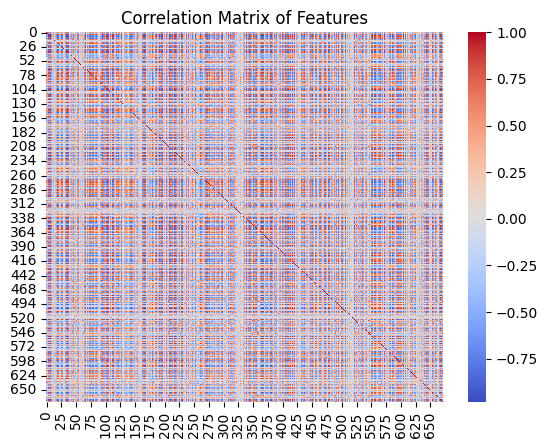

In [2]:
corr_m_features_original = features.corr()

plt.figure()
sns.heatmap(corr_m_features_original, cmap='coolwarm')
plt.title('Correlation Matrix of Features')

# Feature agglomeration

Text(0.5, 1.0, 'Correlation Matrix of Features')

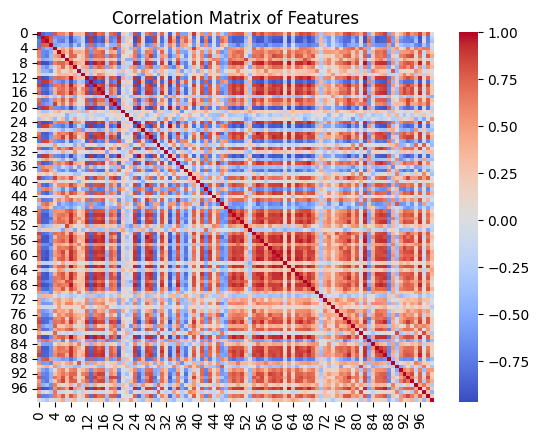

In [3]:
agglo = FeatureAgglomeration(n_clusters=100)
reduced_features = agglo.fit_transform(features)

reduced_features_df = pd.DataFrame(reduced_features)
corr_m_reduced_features = reduced_features_df.corr()

plt.figure()
sns.heatmap(corr_m_reduced_features, cmap='coolwarm')
plt.title('Correlation Matrix of Features')

# Optimal Leaf Ordering

In [4]:
# Step 1: Compute the pairwise distances
distance_matrix = pdist(reduced_features_df, metric='euclidean')

# Step 2: Perform the hierarchical clustering
linked = linkage(distance_matrix, method='ward')

# Step 3: Optimal leaf ordering
ordered_linked = optimal_leaf_ordering(linked, distance_matrix)

In [ ]:
plt.figure(figsize=(10, 7))
dendrogram(ordered_linked)
plt.title('Hierarchical Clustering with Optimal Leaf Ordering')
plt.show()

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [5.0, 5.0, 20.0, 20.0],
  [45.0, 45.0, 55.0, 55.0],
  [35.0, 35.0, 50.0, 50.0],
  [65.0, 65.0, 75.0, 75.0],
  [85.0, 85.0, 95.0, 95.0],
  [70.0, 70.0, 90.0, 90.0],
  [42.5, 42.5, 80.0, 80.0],
  [115.0, 115.0, 125.0, 125.0],
  [105.0, 105.0, 120.0, 120.0],
  [135.0, 135.0, 145.0, 145.0],
  [155.0, 155.0, 165.0, 165.0],
  [175.0, 175.0, 185.0, 185.0],
  [160.0, 160.0, 180.0, 180.0],
  [140.0, 140.0, 170.0, 170.0],
  [205.0, 205.0, 215.0, 215.0],
  [195.0, 195.0, 210.0, 210.0],
  [225.0, 225.0, 235.0, 235.0],
  [245.0, 245.0, 255.0, 255.0],
  [265.0, 265.0, 275.0, 275.0],
  [285.0, 285.0, 295.0, 295.0],
  [270.0, 270.0, 290.0, 290.0],
  [250.0, 250.0, 280.0, 280.0],
  [230.0, 230.0, 265.0, 265.0],
  [202.5, 202.5, 247.5, 247.5],
  [155.0, 155.0, 225.0, 225.0],
  [315.0, 315.0, 325.0, 325.0],
  [335.0, 335.0, 345.0, 345.0],
  [320.0, 320.0, 340.0, 340.0],
  [305.0, 305.0, 330.0, 330.0],
  [190.0, 190.0, 317.5, 317.5],
  [112.5, 112.5, 253.75, 253.75]

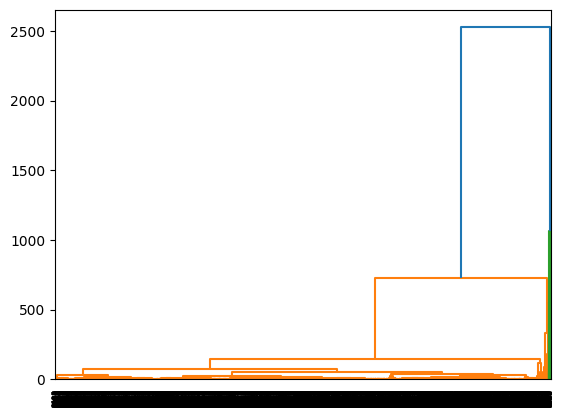

In [ ]:
distance_matrix = pdist(reduced_features)
linked = linkage(distance_matrix, method='ward')
plt.figure()
dendrogram(linked)


# Mean differences between sets of features

Text(0.5, 1.0, 'Mito')

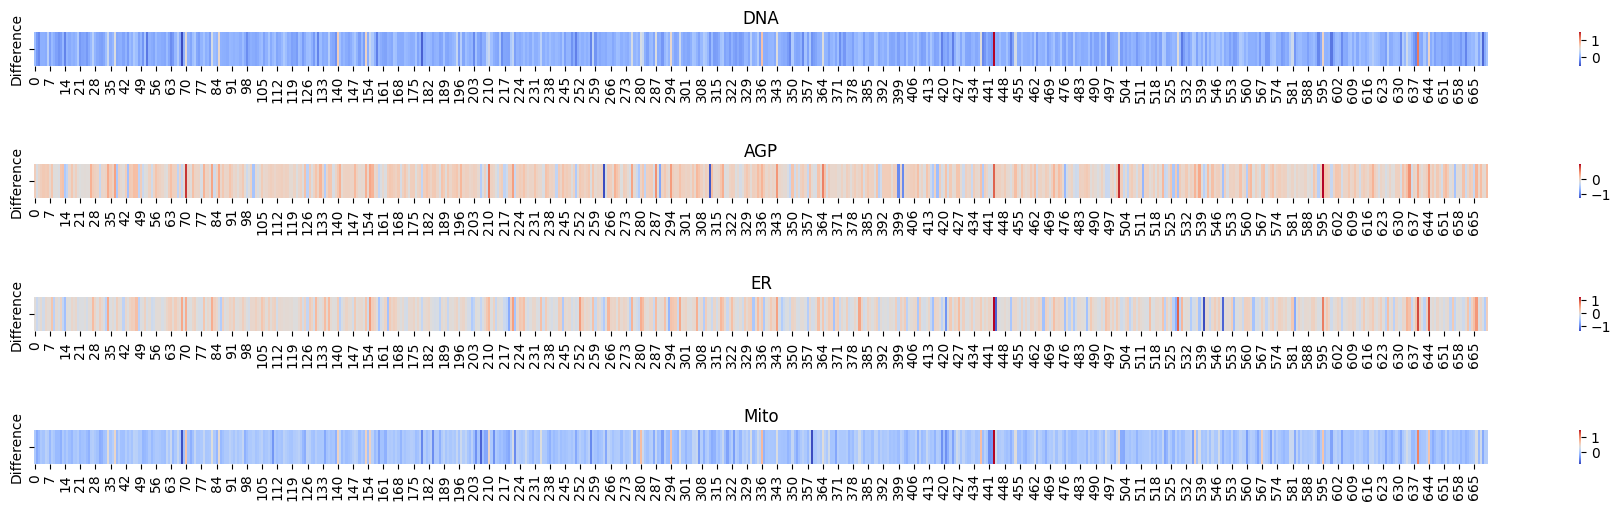

In [2]:
mean_differences_DNA = pd.DataFrame((features - features_DNA).mean(axis=0), columns=['Difference']).transpose()
mean_differences_AGP = pd.DataFrame((features - features_AGP).mean(axis=0), columns=['Difference']).transpose()
mean_differences_ER = pd.DataFrame((features - features_ER).mean(axis=0), columns=['Difference']).transpose()
mean_differences_Mito = pd.DataFrame((features - features_Mito).mean(axis=0), columns=['Difference']).transpose()

# Create the heatmap
fig, ax = plt.subplots(4, figsize=(20,6))
fig.tight_layout(pad=5.0)
sns.heatmap(mean_differences_DNA, cmap='coolwarm', ax=ax[0])
sns.heatmap(mean_differences_AGP, cmap='coolwarm', ax=ax[1])
sns.heatmap(mean_differences_ER, cmap='coolwarm', ax=ax[2])
sns.heatmap(mean_differences_Mito, cmap='coolwarm', ax=ax[3])
ax[0].set_title("DNA")
ax[1].set_title("AGP")
ax[2].set_title("ER")
ax[3].set_title("Mito")

Text(0.5, 1.0, 'Mito')

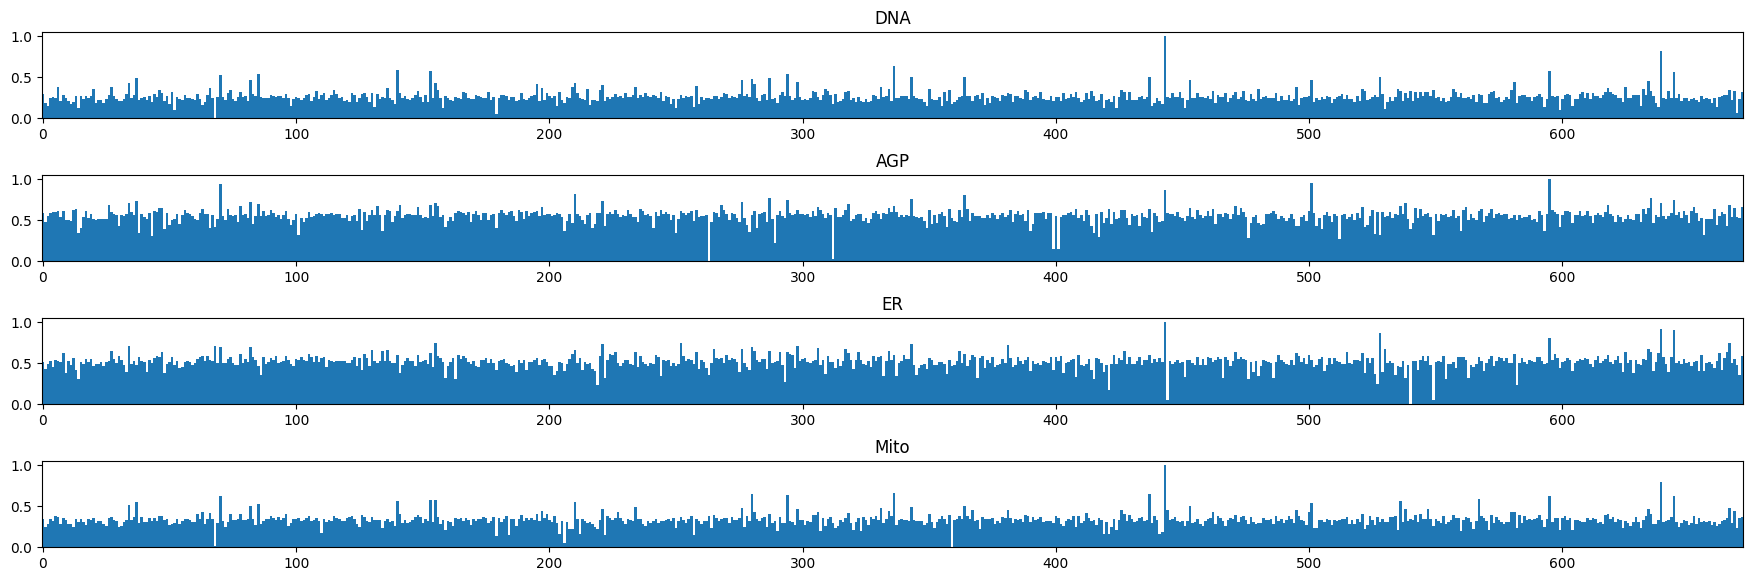

In [3]:
mean_difference_DNA = (np.array(features) - np.array(features_DNA)).mean(axis=0)
mean_difference_norm_DNA = ((mean_difference_DNA - mean_difference_DNA.min()) / (mean_difference_DNA.max() - mean_difference_DNA.min()))

mean_difference_AGP = (np.array(features) - np.array(features_AGP)).mean(axis=0)
mean_difference_norm_AGP = ((mean_difference_AGP - mean_difference_AGP.min()) / (mean_difference_AGP.max() - mean_difference_AGP.min()))

mean_difference_ER = (np.array(features) - np.array(features_ER)).mean(axis=0)
mean_difference_norm_ER = ((mean_difference_ER - mean_difference_ER.min()) / (mean_difference_ER.max() - mean_difference_ER.min()))

mean_difference_Mito = (np.array(features) - np.array(features_Mito)).mean(axis=0)
mean_difference_norm_Mito = ((mean_difference_Mito - mean_difference_Mito.min()) / (mean_difference_Mito.max() - mean_difference_Mito.min()))


fig, ax = plt.subplots(4, figsize=(18,6))
fig.tight_layout(pad=2.0)
ax[0].bar(list(range(672)), mean_difference_norm_DNA, width=1)
ax[1].bar(list(range(672)), mean_difference_norm_AGP, width=1)
ax[2].bar(list(range(672)), mean_difference_norm_ER, width=1)
ax[3].bar(list(range(672)), mean_difference_norm_Mito, width=1)

ax[0].margins(x=0)
ax[1].margins(x=0)
ax[2].margins(x=0)
ax[3].margins(x=0)

ax[0].set_title("DNA")
ax[1].set_title("AGP")
ax[2].set_title("ER")
ax[3].set_title("Mito")

Text(0.5, 1.0, 'Mito')

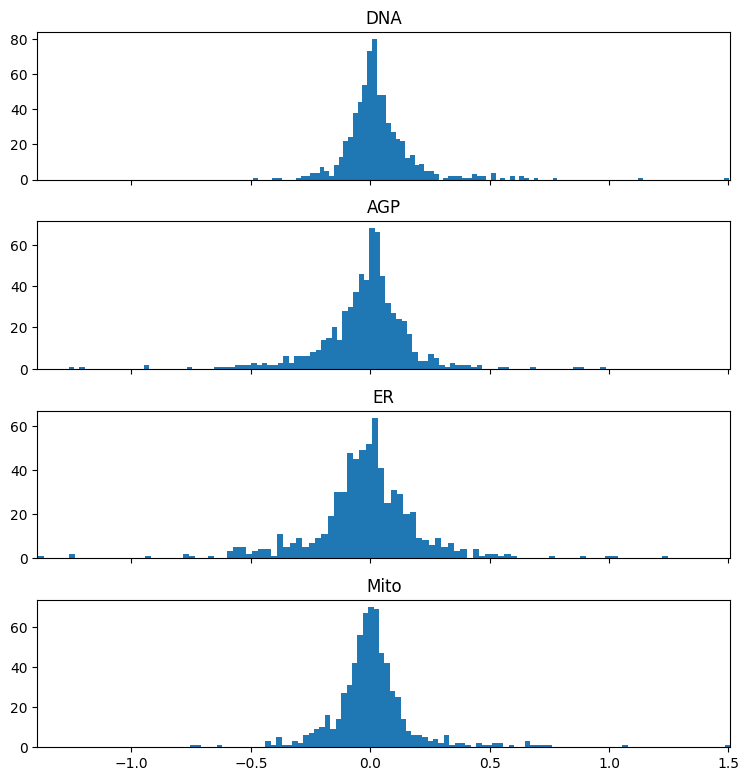

In [4]:
bins = 100

fig, ax = plt.subplots(4, figsize=(8,8), sharex=True)
fig.tight_layout(pad=2.0)
ax[0].hist(mean_difference_DNA, bins=bins)
ax[1].hist(mean_difference_AGP, bins=bins)
ax[2].hist(mean_difference_ER, bins=bins)
ax[3].hist(mean_difference_Mito, bins=bins)

ax[0].margins(x=0)
ax[1].margins(x=0)
ax[2].margins(x=0)
ax[3].margins(x=0)

ax[0].set_title("DNA")
ax[1].set_title("AGP")
ax[2].set_title("ER")
ax[3].set_title("Mito")

# Feature selection
## Removing features with low variance
Removes all features whose variance doesn’t meet some threshold. By default, it removes all zero-variance features, i.e. features that have the same value in all samples.

In [5]:
thr = 0.5

sel_original = VarianceThreshold(threshold=thr)
reduced_features_original = sel_original.fit_transform(features)

for channel in channels:

    sel_channel = VarianceThreshold(threshold=thr)
    reduced_features = sel_channel.fit_transform(globals()[f"features_{channel}"])

    obtained_original = sel_original.get_support(indices=True)
    obtained_channel = sel_channel.get_support(indices=True)

    print("Obtained original features:", len(obtained_original))
    print(f"Obtained {channel} features:", len(obtained_channel))
    print("Intersection of obtained features:", len(np.intersect1d(obtained_original, obtained_channel)))
    print()


Obtained original features: 371
Obtained DNA features: 146
Intersection of obtained features: 100

Obtained original features: 371
Obtained AGP features: 561
Intersection of obtained features: 340

Obtained original features: 371
Obtained ER features: 614
Intersection of obtained features: 352

Obtained original features: 371
Obtained Mito features: 370
Intersection of obtained features: 254



## Univariate feature selection
Works by selecting the best features based on univariate statistical tests.

```f_classif```: Compute the ANOVA F-value for the provided sample.

In [6]:
k = 100

sel_original = SelectKBest(f_classif, k=k)
k_best_original_ = sel_original.fit_transform(features, np.array(wells_original["Treatment"]))
selected_features_original = sel_original.get_support(indices=True)

for channel in channels:

    sel_channel = SelectKBest(f_classif, k=k)

    k_best_channel_ = sel_channel.fit_transform(globals()[f"features_{channel}"], np.array(globals()[f"wells_{channel}"]["Treatment"]))

    selected_features_channel = sel_channel.get_support(indices=True)

    intersected_features = np.intersect1d(selected_features_original, selected_features_channel)

    print(f"Original {k}-best features:", " ".join(list(map(str, selected_features_original))))
    print(f"{channel} {k}-best features:", " ".join(list(map(str, selected_features_channel))))
    print(f"Intersection ({len(intersected_features)} features):", " ".join(list(map(str, intersected_features))))
    print()

Original 100-best features: 1 6 7 11 21 36 39 48 50 53 72 76 80 82 83 85 91 93 95 98 105 116 141 143 152 153 165 174 179 181 195 196 197 247 266 270 273 280 284 285 287 294 297 298 309 314 329 334 336 338 342 350 358 364 379 381 383 399 410 420 426 431 443 446 451 462 464 471 474 501 502 509 530 531 535 542 557 566 572 576 580 591 592 594 595 599 604 605 610 614 617 620 629 634 638 639 644 647 654 659
DNA 100-best features: 2 12 52 53 57 59 64 66 68 74 76 81 93 97 108 121 131 134 136 139 147 155 158 165 180 188 190 195 198 208 223 231 233 236 240 244 245 248 270 277 278 279 300 302 309 321 326 329 335 343 345 352 356 361 370 378 381 385 394 402 415 418 419 430 432 438 439 445 447 449 458 463 467 476 493 499 513 522 529 530 536 538 546 547 549 553 565 570 575 581 592 604 606 607 608 618 621 638 657 669
Intersection (13 features): 53 76 93 165 195 270 309 329 381 530 592 604 638

Original 100-best features: 1 6 7 11 21 36 39 48 50 53 72 76 80 82 83 85 91 93 95 98 105 116 141 143 152 153 